In [3]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
%matplotlib inline

dataset = pd.read_csv("weather-data.csv")
# change the "valid" column value type from object to datetime
dataset['valid'] = pd.to_datetime(dataset['valid'])
dataset.head() # Show the first five results.


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


In [4]:
# We do not need the peak_wind_drct so remove them.
# We also dont need gust because it didnot happend very often based on EDA so we will remove this colomn as well
# We will also remove all other columns which we dont need ( I want predict only temperature based on day)
dataset.drop(columns=["peak_wind_drct", "gust"," station","dwpc","relh","sknt"], inplace=True)
dataset.head()

,valid,tmpc
0,2015-01-01 00:00:00,21.0
1,2015-01-01 00:30:00,21.0
2,2015-01-01 01:00:00,21.0
3,2015-01-01 01:30:00,21.0
4,2015-01-01 02:00:00,21.0


In [5]:
#For our future prediction we dont need temperature each 30 minutes so to reduce these ammount of data we should split "valid" column into
#  2 columns: date and time to reduce numbers of rows late
dataset['date'] = pd.to_datetime(dataset['valid']).dt.date
dataset['time'] = pd.to_datetime(dataset['valid']).dt.time
dataset.head()


,valid,tmpc,date,time
0,2015-01-01 00:00:00,21.0,2015-01-01,00:00:00
1,2015-01-01 00:30:00,21.0,2015-01-01,00:30:00
2,2015-01-01 01:00:00,21.0,2015-01-01,01:00:00
3,2015-01-01 01:30:00,21.0,2015-01-01,01:30:00
4,2015-01-01 02:00:00,21.0,2015-01-01,02:00:00


In [6]:
# Now we can remove"valid" column as well
dataset.drop(columns=["valid"], inplace=True)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   date    103713 non-null  object 
 2   time    103713 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [7]:
# I want predict only midday temperature based on midday temperature so we will drop other rows
# befor it we need change value for time on string because after we split value is object again for time and date columns
dataset['time'] = dataset['time'].astype("string")
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   date    103713 non-null  object 
 2   time    103713 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 2.4+ MB


In [8]:
# now we can remove all rows and leave only temperature at 12PM every day
dataset = dataset.loc[dataset["time"] == "12:00:00"]  
dataset.head()

,tmpc,date,time
24,15.0,2015-01-01,12:00:00
72,17.0,2015-01-02,12:00:00
120,16.0,2015-01-03,12:00:00
168,18.0,2015-01-04,12:00:00
216,18.0,2015-01-05,12:00:00


In [9]:
# Now I'll split date column into 3: day,mounth, year

dataset['yyyy'] = pd.to_datetime(dataset['date']).dt.year
dataset['mm'] = pd.to_datetime(dataset['date']).dt.month
dataset['dd'] = pd.to_datetime(dataset['date']).dt.day
#dataset.drop(columns=["date"], inplace=True)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 24 to 103689
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    2170 non-null   float64
 1   date    2171 non-null   object 
 2   time    2171 non-null   string 
 3   yyyy    2171 non-null   int64  
 4   mm      2171 non-null   int64  
 5   dd      2171 non-null   int64  
dtypes: float64(1), int64(3), object(1), string(1)
memory usage: 118.7+ KB


In [10]:
#after it we dont need date column and can delete it, as a time column
dataset.drop(columns=["date","time"], inplace=True)
dataset.head()

,tmpc,yyyy,mm,dd
24,15.0,2015,1,1
72,17.0,2015,1,2
120,16.0,2015,1,3
168,18.0,2015,1,4
216,18.0,2015,1,5


In [11]:
# We can drop year column because we will predict temperature for days
dataset.drop(columns=["yyyy"], inplace=True)
dataset.head()

,tmpc,mm,dd
24,15.0,1,1
72,17.0,1,2
120,16.0,1,3
168,18.0,1,4
216,18.0,1,5


In [12]:
# I want predict temperature for example only for august  in this case I can delete all othere rows for other mounths
dataset = dataset.loc[dataset["mm"] == 8]  
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 9885 to 97889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    185 non-null    float64
 1   mm      185 non-null    int64  
 2   dd      185 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


In [13]:
# finally we can remove mounth column as well
dataset.drop(columns=["mm"], inplace=True)
dataset.head()

,tmpc,dd
9885,10.0,1
9933,14.0,2
9977,14.0,3
10058,14.0,5
10098,11.0,6


In [14]:
x_train, x_test, y_train, y_test = train_test_split(dataset["dd"], dataset["tmpc"], test_size = 0.2)

x_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 148 entries, 11110 to 26856
Series name: dd
Non-Null Count  Dtype
--------------  -----
148 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [15]:
x_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 37 entries, 43939 to 44803
Series name: dd
Non-Null Count  Dtype
--------------  -----
37 non-null     int64
dtypes: int64(1)
memory usage: 592.0 bytes


In [16]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 148 entries, 11110 to 26856
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
148 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [17]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 37 entries, 43939 to 44803
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
37 non-null     float64
dtypes: float64(1)
memory usage: 592.0 bytes


Text(0, 0.5, 'Temperature')

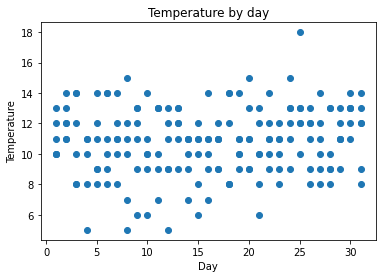

In [18]:
plt.plot(dataset["dd"], dataset["tmpc"], 'o')
plt.title("Temperature by day")
plt.xlabel("Day")
plt.ylabel("Temperature")

In [19]:
X, y = make_regression(n_samples=148, n_features=30, noise=0, random_state=42)
trainX, testX, trainY, testY = train_test_split(dataset[["dd"]], dataset["tmpc"], test_size=0.2)


In [20]:
model = LinearRegression()

model.fit(trainX, trainY)

LinearRegression()

In [21]:
model.score(testX, testY)


-0.05070785478014295

In [34]:
#model.predict([[27]])

model.predict(testX)



   

array([10.37865884, 10.22630919, 11.02614484, 10.2643966 , 10.60718331,
       10.79762037, 10.87379519, 11.02614484, 10.41674625, 10.83570778,
       10.41674625, 10.45483366, 10.91188261, 11.36893155, 10.83570778,
       11.14040708, 11.14040708, 10.45483366, 11.29275672, 11.14040708,
       11.02614484, 11.10231966, 10.72144555, 10.98805743, 10.68335813,
       10.79762037, 10.64527072, 11.17849449, 10.2643966 , 10.34057143,
       10.83570778, 11.06423225, 11.25466931, 10.30248402, 11.2165819 ,
       10.41674625, 10.5690959 ])